# Лабораторная работа 2

## Общая информация

**Дата выдачи**: 16.09.2022/19.09.2022

**Срок сдачи**: 30.09.2022/03.10.2022 *(Но требуется обязательная демонстрация текущего прогресса преподавателю во время лабораторного занятия 23.09.2022/26.09.2022)*

### О задании
Целью данного задания является ознакомление с основными методами первичного анализа данных, обучение моделей машинного обучения, снятие метрик качества работы этих моделей. Ознакомление с платформой *kaggle.com*

### Оценивание и штрафы
Максимально допустимая оценка за работу — 10 баллов.

Сдача заданий после указанного срока сдачи ведёт к снижению оценки.

Задание выполняется САМОСТОЯТЕЛЬНО. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий в открытом источнике, необходимо прислать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник). 

### Формат сдачи
** Устная защита выполненной лабораторной работы ОБЯЗАТЕЛЬНА! **

После успешной устной защиты переименуйте получившийся файл `*.ipynb` в соответствии со следующим форматом: *Username_lab_2.ipynb*, где Username — ваша фамилия на латинице (например, `lehusheu_lab_2.ipynb`) и отправьте этот файл электронной почтой по адресу `dmitri.legushev.bsu@gmail.com` c темой письма *Фамилия преподавателя - Лабораторная работа 2 - Фамилия Имя Отчество* (для обоих подгрупп). Подгруппа Атрохова Кирилла Георгиевича также ставит в копию адрес `?`. Это будет являться письменным отчетом о выполнении лабораторной работы.

**Задача:** Используя алгоритмы машинного обучения, создать модели, которые предсказывают какой пассажир 
    выжил после крушения на Титанике. 

**Данные:** 
Обучающая выборка должна быть использована для построения ваших моделей машинного обучения. Для обучающей выборки есть таргет *survived*. 

Тестовая выборка таргета не имеет. Она должна использоваться для оценки качества работы ваших моделей на платформе *kaggle.com*

**Подробнее о данных:** https://www.kaggle.com/competitions/titanic/data

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,f1_score,accuracy_score,recall_score,precision_score, auc, roc_curve, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

**1.** Загрузить данные для обучения и теста, найти признаки с пропущенными значениями.

In [3]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [4]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**2.** Проанализировать все признаки. Для каждого признака определить:
* Получить основные статистики (`describe`)
* Количество пропусков
* Тип признака (категориальные, текстовые, числовые)
* Для категориальных данных определить уникальные значения
* Для категориальных данных построить bar plot (`plt.bar()`), определить признаковое распредение значений
* Для числовых признаков построить гистограмму (`plt.hist()`), попробовать разное количество бинов (*bins*) в разбиении. Определить тип распределения(равномерный, нормальный ...)

In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

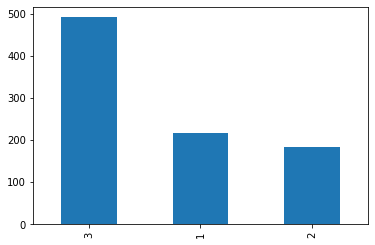

In [7]:
train.Pclass.value_counts().plot(kind='bar')

<AxesSubplot:>

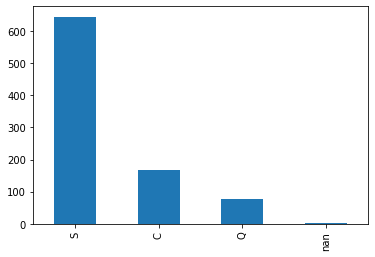

In [8]:
train.Embarked.value_counts(dropna=False).plot(kind='bar')

<AxesSubplot:ylabel='Frequency'>

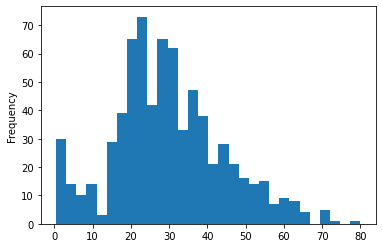

In [9]:
train.Age.plot.hist(bins=30)

<AxesSubplot:ylabel='Frequency'>

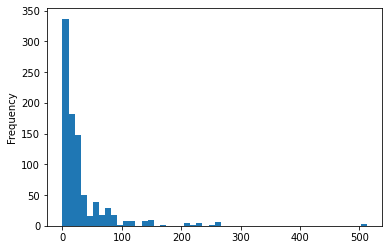

In [10]:
train.Fare.plot.hist(bins=50)

**3.** Препроцессинг данных
Для каждого признака необходимо:
* Заменить пропуски
* Для категориальных текстовых признаков получить категориальные числовые (признак *Sex*). Попробовать из sklearn `LabelEncoder` и `OneHotEncoder` (на выбор)
* Нормализовать признаки

Замена пропусков может быть реализована через:
* заменой средним
* заменой медианой
* заменой модой (наиболее встречающимся значением)
* для категориальных признаков заменой наиболее встречающимся значением или созданием новой категории "не определено"
* заменой следующим или предыдущим значением (`fillna`)

Нормализация (*sklearn*):
* `MinMaxScaler`
* `StandartScaler`
* `RobustScaler`

Сделать для *train* и *test* данных.

### Train ###

In [11]:
train.replace(to_replace={'male': 1, 'female': 0}, inplace=True)
train['Embarked'].dropna()
train.drop(['Name','Ticket','Cabin'], inplace=True, axis=1)
train['Age'] = train.Age.fillna(train.Age.mean())
train.replace(to_replace={'S': 0, 'C': 1,'Q':2}, inplace=True)
train['Embarked'] = train.Embarked.fillna(3)
train.Embarked = train.Embarked.astype(int)

In [12]:
mm_scaler = MinMaxScaler()
st_scaler = StandardScaler()
ro_scaler = RobustScaler()
train_mm = pd.DataFrame(mm_scaler.fit_transform(train),columns=train.keys())
train_st = pd.DataFrame(st_scaler.fit_transform(train),columns=train.keys())
train_ro = pd.DataFrame(ro_scaler.fit_transform(train),columns=train.keys())

### Test ###

In [13]:
test.replace(to_replace={'male': 1, 'female': 0}, inplace=True)
test['Embarked'].dropna()
test.drop(['Name','Ticket','Cabin'], inplace=True, axis=1)
test['Age'] = test.Age.fillna(test.Age.mean())
test.replace(to_replace={'S': 0, 'C': 1,'Q':2}, inplace=True)
test['Embarked'] = test.Embarked.fillna(3)
test.Embarked = test.Embarked.astype(int)

In [14]:
test.loc[(test.Pclass==3), 'Fare'] = test.loc[(test.Pclass==3), 'Fare'].fillna(test.loc[(test.Pclass==3), 'Fare'].mean())
test.loc[(test.Pclass==2), 'Fare'] = test.loc[(test.Pclass==2), 'Fare'].fillna(test.loc[(test.Pclass==2), 'Fare'].mean())
test.loc[(test.Pclass==1), 'Fare'] = test.loc[(test.Pclass==1), 'Fare'].fillna(test.loc[(test.Pclass==1), 'Fare'].mean())

In [15]:
test.Fare.isna().sum()

0

In [16]:
st_scaler = StandardScaler()
test_st = pd.DataFrame(st_scaler.fit_transform(test),columns=test.keys())

**4.** Разбить данные для обучения на тренировочную и валидационную выборки. Для оценки качества модели необходимо проверить полученную модель на валидационных данных  (`train_test_split(X, y, random_state=42, stratify=y, test_size=20)`)

In [17]:
X_train_mm, X_test_mm, y_train_mm, y_test_mm = train_test_split(train_mm.drop('Survived',axis=1), train.Survived, random_state=42, test_size=20)
X_train_st, X_test_st, y_train_st, y_test_st = train_test_split(train_st.drop('Survived',axis=1), train.Survived, random_state=42, test_size=20)
X_train_ro, X_test_ro, y_train_ro, y_test_ro = train_test_split(train_ro.drop('Survived',axis=1), train.Survived, random_state=42, test_size=20)

**5.** 
#### Обучить на предобработанных данных следующие модели:
* Логистическая регрессия (`LogisticRegression`)
* Машины опорных векторов (`SVC`)
* Метод ближайших соседей (`KNeighborsClassifier`)
* Наивый байес (`GaussianNB`)
* Дерево решений (`DecisionTreeClassifier`)
* Случайный лес (`RandomForestClassifier`)
* Градиентный бустинг (`GradientBoostingClassifier`)

#### С каждой модели снять метрики, полученные на валидационных данных. Получить:
* *Accuracy*
* *Precision*
* *Recall*
* *F1-score*
* *ConfusionMatrix*

**Tip**:
`sklearn.metrics.classification_report`

#### Для каждой модели подобрать гиперпараметры, приносящие лучший скор на валидационных данных.

In [18]:
results = {}

## LogisticRegression ##

In [19]:
clf_mm = LogisticRegression().fit(X_train_mm, y_train_mm)
pred_mm = clf_mm.predict(X_test_mm)

clf_st = LogisticRegression().fit(X_train_st, y_train_st)
pred_st = clf_st.predict(X_test_st)

clf_ro = LogisticRegression().fit(X_train_ro, y_train_ro)
pred_ro = clf_ro.predict(X_test_ro)

print(classification_report(y_test_mm,pred_mm))

print(classification_report(y_test_st,pred_st))

print(classification_report(y_test_ro,pred_ro))

results['Logistic Regression'] = [accuracy_score(y_test_mm, pred_mm), accuracy_score(y_test_st, pred_st), accuracy_score(y_test_ro, pred_ro)] 

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.80      0.89        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90      0.90        20

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.80      0.89        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90      0.90        20

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.80      0.89        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90      0.90        20



In [20]:
"""
print(f'{accuracy_score(y_test_mm, pred_mm)=}')
print(f'{precision_score(y_test_mm, pred_mm)=}')
print(f'{recall_score(y_test_mm, pred_mm)=}')
print(f'{f1_score(y_test_mm, pred_mm)=}')
print(confusion_matrix(y_test_mm, pred_mm))"""

"""print(f'{accuracy_score(y_test_st, pred_st)=}')
print(f'{precision_score(y_test_st, pred_st)=}')
print(f'{recall_score(y_test_st, pred_st)=}')
print(f'{f1_score(y_test_st, pred_st)=}')
print(confusion_matrix(y_test_st, pred_st))"""

"""print(f'{accuracy_score(y_test_ro, pred_ro)=}')
print(f'{precision_score(y_test_ro, pred_ro)=}')
print(f'{recall_score(y_test_ro, pred_ro)=}')
print(f'{f1_score(y_test_ro, pred_ro)=}')
print(confusion_matrix(y_test_ro, pred_ro))"""

"print(f'{accuracy_score(y_test_ro, pred_ro)=}')\nprint(f'{precision_score(y_test_ro, pred_ro)=}')\nprint(f'{recall_score(y_test_ro, pred_ro)=}')\nprint(f'{f1_score(y_test_ro, pred_ro)=}')\nprint(confusion_matrix(y_test_ro, pred_ro))"

## SVC ##

In [21]:
svc_mm = make_pipeline(MinMaxScaler(), SVC(gamma='auto'))
svc_st = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svc_ro = make_pipeline(RobustScaler(), SVC(gamma='auto'))

clf_svc_mm = svc_mm.fit(X_train_mm, y_train_mm)
clf_svc_st = svc_st.fit(X_train_st, y_train_st)
clf_svc_ro = svc_ro.fit(X_train_ro, y_train_ro)

pred_svc_mm = clf_svc_mm.predict(X_test_mm)
pred_svc_st = clf_svc_st.predict(X_test_st)
pred_svc_ro = clf_svc_ro.predict(X_test_ro)


print(classification_report(y_test_mm,pred_svc_mm))

print(classification_report(y_test_st,pred_svc_st))

print(classification_report(y_test_ro,pred_svc_ro))

results['SVC'] = [accuracy_score(y_test_mm, pred_svc_mm), accuracy_score(y_test_st, pred_svc_st), accuracy_score(y_test_ro, pred_svc_ro)] 

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       0.89      0.80      0.84        10

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.85        20
weighted avg       0.85      0.85      0.85        20

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.80      0.89        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90      0.90        20

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.80      0.89        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90      0.90        20



## KNeighborsClassifier ##

In [22]:
neigh_mms = list(KNeighborsClassifier(n_neighbors=i) for i in range(1,100))

for i in range(99):
    neigh_mms[i].fit(X_train_ro, y_train_ro)

pred_Kneigh_mms = list(neigh_mms[i].predict(X_test_ro) for i in range(99))

for i in range(99):
    print('## ',i+1,' ##')
    print(classification_report(y_test_ro, pred_Kneigh_mms[i]))
# лучшее для MinMaxScaler при n_neighbors=21, для StandardScaler = 23, для RobustScaler = 1

##  1  ##
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.80      0.89        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90      0.90        20

##  2  ##
              precision    recall  f1-score   support

           0       0.67      1.00      0.80        10
           1       1.00      0.50      0.67        10

    accuracy                           0.75        20
   macro avg       0.83      0.75      0.73        20
weighted avg       0.83      0.75      0.73        20

##  3  ##
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        10
           1       1.00      0.70      0.82        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0.88      0.85      0.85 


##  54  ##
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        10
           1       1.00      0.70      0.82        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0.88      0.85      0.85        20

##  55  ##
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        10
           1       1.00      0.70      0.82        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0.88      0.85      0.85        20

##  56  ##
              precision    recall  f1-score   support

           0       0.71      1.00      0.83        10
           1       1.00      0.60      0.75        10

    accuracy                           0.80        20
   macro avg       0.86      0.80      0.79        20
weighted avg       0.86      0.80      0

In [23]:
neigh_mm = KNeighborsClassifier(n_neighbors=21)
neigh_st = KNeighborsClassifier(n_neighbors=23)
neigh_ro = KNeighborsClassifier(n_neighbors=1)

neigh_mm.fit(X_train_mm, y_train_mm)
neigh_st.fit(X_train_st, y_train_st)
neigh_ro.fit(X_train_ro, y_train_ro)

pred_Kneigh_mm = neigh_mm.predict(X_test_mm)
pred_Kneigh_st = neigh_st.predict(X_test_st)
pred_Kneigh_ro = neigh_ro.predict(X_test_ro)

print(classification_report(y_test_mm, pred_Kneigh_mm))
print(classification_report(y_test_st, pred_Kneigh_st))
print(classification_report(y_test_ro, pred_Kneigh_ro))

results['KNeighborsClassifier'] = [accuracy_score(y_test_mm, pred_Kneigh_mm), accuracy_score(y_test_st, pred_Kneigh_st), accuracy_score(y_test_ro, pred_Kneigh_ro)] 

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.90      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.90      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.80      0.89        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90      0.90        20



## GaussianNB ##

In [24]:
clf_gauss_mm = GaussianNB()
clf_gauss_st = GaussianNB()
clf_gauss_ro = GaussianNB()

clf_gauss_mm.fit(X_train_mm, y_train_mm)
clf_gauss_st.fit(X_train_st, y_train_st)
clf_gauss_ro.fit(X_train_ro, y_train_ro)

pred_gauss_mm = clf_gauss_mm.predict(X_test_mm)
pred_gauss_st = clf_gauss_st.predict(X_test_st)
pred_gauss_ro = clf_gauss_ro.predict(X_test_ro)

print(classification_report(y_test_mm,pred_gauss_mm))
print(classification_report(y_test_st,pred_gauss_st))
print(classification_report(y_test_ro,pred_gauss_ro))

results['GaussianNB'] = [accuracy_score(y_test_mm, pred_gauss_mm), accuracy_score(y_test_st, pred_gauss_st), accuracy_score(y_test_ro, pred_gauss_ro)] 

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.80      0.89        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90      0.90        20

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.80      0.89        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90      0.90        20

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.80      0.89        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90      0.90        20



## DecisionTreeClassifier ##

In [25]:
clf_tree_mm = DecisionTreeClassifier(random_state=0)
clf_tree_st = DecisionTreeClassifier(random_state=0)
clf_tree_ro = DecisionTreeClassifier(random_state=0)

clf_tree_mm.fit(X_train_mm, y_train_mm)
clf_tree_st.fit(X_train_st, y_train_st)
clf_tree_ro.fit(X_train_ro, y_train_ro)

pred_tree_mm = clf_tree_mm.predict(X_test_mm)
pred_tree_st = clf_tree_st.predict(X_test_st)
pred_tree_ro = clf_tree_ro.predict(X_test_ro)

print(classification_report(y_test_mm, pred_tree_mm))
print(classification_report(y_test_st, pred_tree_st))
print(classification_report(y_test_ro, pred_tree_ro))

results['Decision'] = [accuracy_score(y_test_mm, pred_tree_mm), accuracy_score(y_test_st, pred_tree_st), accuracy_score(y_test_ro, pred_tree_ro)] 

              precision    recall  f1-score   support

           0       0.75      0.90      0.82        10
           1       0.88      0.70      0.78        10

    accuracy                           0.80        20
   macro avg       0.81      0.80      0.80        20
weighted avg       0.81      0.80      0.80        20

              precision    recall  f1-score   support

           0       0.75      0.90      0.82        10
           1       0.88      0.70      0.78        10

    accuracy                           0.80        20
   macro avg       0.81      0.80      0.80        20
weighted avg       0.81      0.80      0.80        20

              precision    recall  f1-score   support

           0       0.75      0.90      0.82        10
           1       0.88      0.70      0.78        10

    accuracy                           0.80        20
   macro avg       0.81      0.80      0.80        20
weighted avg       0.81      0.80      0.80        20



## RandomForestClassifier ##

In [26]:
clf_forest_mm = RandomForestClassifier()
clf_forest_st = RandomForestClassifier()
clf_forest_ro = RandomForestClassifier()

clf_forest_mm.fit(X_train_mm, y_train_mm)
clf_forest_st.fit(X_train_st, y_train_st)
clf_forest_ro.fit(X_train_ro, y_train_ro)

pred_forest_mm = clf_forest_mm.predict(X_test_mm)
pred_forest_st = clf_forest_st.predict(X_test_st)
pred_forest_ro = clf_forest_ro.predict(X_test_ro)

print(classification_report(y_test_mm, pred_forest_mm))
print(classification_report(y_test_st, pred_forest_st))
print(classification_report(y_test_ro, pred_forest_ro))

results['RandomForestClassifier'] = [accuracy_score(y_test_mm, pred_forest_mm), accuracy_score(y_test_st, pred_forest_st), accuracy_score(y_test_ro, pred_forest_ro)] 

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.80      0.89        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90      0.90        20

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.90      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.80      0.89        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90      0.90        20



## GradientBoostingClassifier ##

In [27]:
clf_grad_mm = GradientBoostingClassifier(n_estimators=100, learning_rate=1, max_depth=1, random_state=0)
clf_grad_st = GradientBoostingClassifier(n_estimators=100, learning_rate=1, max_depth=1, random_state=0)
clf_grad_ro = GradientBoostingClassifier(n_estimators=100, learning_rate=1, max_depth=1, random_state=0)

clf_grad_mm.fit(X_train_mm, y_train_mm)
clf_grad_st.fit(X_train_st, y_train_st)
clf_grad_ro.fit(X_train_ro, y_train_ro)

pred_grad_mm = clf_grad_mm.predict(X_test_mm)
pred_grad_st = clf_grad_st.predict(X_test_st)
pred_grad_ro = clf_grad_ro.predict(X_test_ro)

print(classification_report(y_test_mm, pred_grad_mm))
print(classification_report(y_test_st, pred_grad_st))
print(classification_report(y_test_ro, pred_grad_ro))

results['GradientBoostingClassifier'] = [accuracy_score(y_test_mm, pred_grad_mm), accuracy_score(y_test_st, pred_grad_st), accuracy_score(y_test_ro, pred_grad_ro)] 

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.90      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.90      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.90      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20



Попробовал RocAucCurve

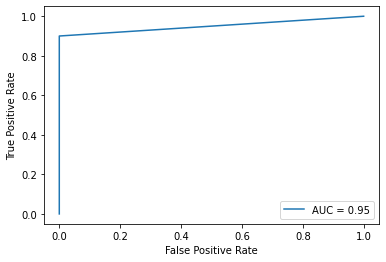

In [28]:
fpr, tpr,_ = roc_curve(y_test_mm, pred_grad_mm)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()

# ВЫВОД #

In [29]:
pd.DataFrame(results,index=['MinMaxScaler','StandardScaler','RobustScaler']).T

,MinMaxScaler,StandardScaler,RobustScaler
Logistic Regression,0.90,0.90,0.90
SVC,0.85,0.90,0.90
KNeighborsClassifier,0.95,0.95,0.90
GaussianNB,0.90,0.90,0.90
Decision,0.80,0.80,0.80
RandomForestClassifier,0.90,0.95,0.90
GradientBoostingClassifier,0.95,0.95,0.95


Как видно наибольная точность достигается при KNeighborsClassifier и GradientBoostingClassifier.Попробую $\color{red}{\text{TODO}}$ Буду использовать StandardScaler.
Впринципе особой разницы нет

In [30]:
pred_test_neigh = neigh_st.predict(test_st)
pred_test_grad = clf_grad_st.predict(test_st)

**6.** 
#### Получить лучший результ на kaggle.com
* Зарегистрироваться на https://www.kaggle.com
* Перейти по ссылке: https://www.kaggle.com/c/titanic/submit
* Засабмитить полученный csv файл и получить результат (*accuracy*)

In [31]:
ypred_Xnew = clf_tree_st.predict(test_st).astype(int)

submission = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': ypred_Xnew })
submission.to_csv("submission_tree.csv", index=False)

In [32]:
0.770

0.77

# Дальнейшие попытки #

In [33]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [34]:
train.replace(to_replace={'male': 1, 'female': 0}, inplace=True)
train.loc[(train.Pclass==3), 'Fare'] = train.loc[(train.Pclass==3), 'Fare'].fillna(train.loc[(train.Pclass==3), 'Fare'].mean())
train.loc[(train.Pclass==2), 'Fare'] = train.loc[(train.Pclass==2), 'Fare'].fillna(train.loc[(train.Pclass==2), 'Fare'].mean())
train.loc[(train.Pclass==1), 'Fare'] = train.loc[(train.Pclass==1), 'Fare'].fillna(train.loc[(train.Pclass==1), 'Fare'].mean())
train['Age'] = train.Age.fillna(train.Age.median())
train.replace(to_replace={'S': 0, 'C': 1,'Q':2}, inplace=True)
train['Embarked'] = train.Embarked.fillna(3)
train.Embarked = train.Embarked.astype(int)
train.drop(['Name','Ticket'], inplace=True, axis=1)


train['Spaces'] = train.Cabin.str.count(' ')
train['Spaces'] = train.Spaces.fillna(-1)
train.Cabin = train.Cabin.str.slice(stop=1)
train['Cabin'] = train.Cabin.fillna('H')
letters = ["A","B","C","D","E","F","G","H","T"]
train.Cabin.replace(to_replace=dict(zip(letters,list(range(len(letters))))), inplace=True)

In [35]:
train.Spaces.value_counts(dropna=False)

-1.0    687
 0.0    180
 1.0     16
 2.0      6
 3.0      2
Name: Spaces, dtype: int64

In [36]:
st_scaler = StandardScaler()
train_st = pd.DataFrame(st_scaler.fit_transform(train),columns=train.keys())

In [37]:
X_train_st, X_test_st, y_train_st, y_test_st = train_test_split(train_st.drop('Survived',axis=1), train.Survived, random_state=42, test_size=20)

In [38]:
clf_st = LogisticRegression(max_iter=10000).fit(X_train_st, y_train_st)
pred_st = clf_st.predict(X_test_st)
print(classification_report(y_test_st,pred_st))


              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.80      0.89        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90      0.90        20



In [39]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [40]:
test.replace(to_replace={'male': 1, 'female': 0}, inplace=True)
test.loc[(test.Pclass==3), 'Fare'] = test.loc[(test.Pclass==3), 'Fare'].fillna(test.loc[(test.Pclass==3), 'Fare'].mean())
test.loc[(test.Pclass==2), 'Fare'] = test.loc[(test.Pclass==2), 'Fare'].fillna(test.loc[(test.Pclass==2), 'Fare'].mean())
test.loc[(test.Pclass==1), 'Fare'] = test.loc[(test.Pclass==1), 'Fare'].fillna(test.loc[(test.Pclass==1), 'Fare'].mean())
test['Age'] = test.Age.fillna(test.Age.median())
test.replace(to_replace={'S': 0, 'C': 1,'Q':2}, inplace=True)
test['Embarked'] = test.Embarked.fillna(3)
test.Embarked = test.Embarked.astype(int)
test.drop(['Name','Ticket'], inplace=True, axis=1)
test['Spaces'] = test.Cabin.str.count(' ')
test['Spaces'] = test.Spaces.fillna(-1)
test.Cabin = test.Cabin.str.slice(stop=1)
test['Cabin'] = test.Cabin.fillna('H')
letters = ["A","B","C","D","E","F","G","H","T"]
test.Cabin.replace(to_replace=dict(zip(letters,list(range(len(letters))))), inplace=True)

In [41]:
test.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       0
Spaces         0
dtype: int64

In [42]:
st_scaler = StandardScaler()
test_st = pd.DataFrame(st_scaler.fit_transform(test),columns=test.keys())

In [43]:
ypred_Xnew = clf_st.predict(test_st).astype(int)

submission = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': ypred_Xnew })
submission.to_csv("submission10000.csv", index=False)

In [44]:
0.763

0.763

In [45]:

neigh_st = KNeighborsClassifier(n_neighbors=31)

neigh_st.fit(X_train_st, y_train_st)
pred_Kneigh_st = neigh_st.predict(X_test_st)
print(classification_report(y_test_st, pred_Kneigh_st))


              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.90      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20



###### 

In [46]:
ypred_Xnew = neigh_st.predict(test_st).astype(int)

submission = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': ypred_Xnew })
submission.to_csv("submission_new_neigh31.csv", index=False)

In [47]:
clf_grad_st = GradientBoostingClassifier(n_estimators=50, learning_rate=0.5, max_depth=1, random_state=0)
clf_grad_st.fit(X_train_st, y_train_st)
pred_grad_st = clf_grad_st.predict(X_test_st)
print(classification_report(y_test_st, pred_grad_st))


              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.90      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20



In [48]:
ypred_Xnew = clf_grad_st.predict(test_st).astype(int)

submission = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': ypred_Xnew })
submission.to_csv("submission_new_grad.csv", index=False)

## FINAL ##

In [62]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [63]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [50]:
train = train.drop(columns=['PassengerId','Name', 'SibSp', 'Parch','Ticket', 'Cabin'], axis=1)

train.Embarked = train['Embarked'].replace(to_replace={np.nan: train.Embarked.mode().to_list()[0]})

embarked_unique = train.Embarked.unique()
for i in embarked_unique:
    train[i] = train.Embarked==i

train = train.drop('Embarked',axis=1)

train.Age = train.Age.fillna(train.Age.mean())

le = LabelEncoder()
for i in embarked_unique:
    le.fit(train[i])
    train[i] = le.transform(train[i])
le.fit(train.Sex)
train.Sex = le.transform(train.Sex)

for i in train.Pclass.unique():
    train.loc[(train.Pclass==i), 'Fare'] = train.loc[(train.Pclass==i), 'Fare'].fillna(train.loc[(train.Pclass==i), 'Fare'].mean())

In [51]:
scaler = StandardScaler()
train_st = pd.DataFrame(scaler.fit_transform(train),columns=train.keys())

In [52]:
X_train_st, X_test_st, y_train_st, y_test_st = train_test_split(train_st.drop('Survived',axis=1), train.Survived, random_state=42, test_size=20)

In [53]:
clf = LogisticRegression(max_iter=10000)

clf.fit(X_train_st,y_train_st)

LogisticRegression(max_iter=10000)

In [54]:
clf = KNeighborsClassifier(n_neighbors=22)

clf.fit(X_train_st,y_train_st)

KNeighborsClassifier(n_neighbors=22)

In [55]:
clf = RandomForestClassifier()

clf.fit(X_train_st,y_train_st)

RandomForestClassifier()

In [56]:
pas_id = test.PassengerId
test = test.drop(columns=['PassengerId','Name', 'SibSp', 'Parch','Ticket', 'Cabin'], axis=1)
test.Embarked = test['Embarked'].replace(to_replace={np.nan: test.Embarked.mode().to_list()[0]})

embarked_unique = test.Embarked.unique()
for i in embarked_unique:
    test[i] = test.Embarked==i
test = test.drop('Embarked',axis=1)

test.Age = test.Age.fillna(test.Age.mean())
le = LabelEncoder()
for i in embarked_unique:
    le.fit(test[i])
    test[i] = le.transform(test[i])
le.fit(test.Sex)
test.Sex = le.transform(test.Sex)
for i in test.Pclass.unique():
    test.loc[(test.Pclass==i), 'Fare'] = test.loc[(test.Pclass==i), 'Fare'].fillna(test.loc[(test.Pclass==i), 'Fare'].mean())

In [57]:
test_st = pd.DataFrame(scaler.fit_transform(test),columns=test.keys())

In [58]:
ypred_Xnew = clf.predict(test_st).astype(int)

submission = pd.DataFrame({'PassengerId': pas_id, 'Survived': ypred_Xnew })
submission.to_csv("submission_final2.csv", index=False)

c:\users\roman\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [61]:
train

,Survived,Pclass,Sex,Age,Fare,S,C,Q
0,0,3,1,22.000000,7.2500,1,0,0
1,1,1,0,38.000000,71.2833,0,1,0
2,1,3,0,26.000000,7.9250,1,0,0
3,1,1,0,35.000000,53.1000,1,0,0
4,0,3,1,35.000000,8.0500,1,0,0
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,13.0000,1,0,0
887,1,1,0,19.000000,30.0000,1,0,0
888,0,3,0,29.699118,23.4500,1,0,0
889,1,1,1,26.000000,30.0000,0,1,0
